In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [5]:
df_combined = pd.read_csv("../CombinedBooksRandomized.csv")
df_combined.tail()

,Title,Author,Author Average Rating,Author Votes,Review Count,Distinct Works,Year,Rating,Raters,Genres,worth_reading
1724,"The Inheritance Games (The Inheritance Games, #1)",Jennifer Lynn Barnes,4.20,817207,96336,35,2020,4.23,320803,"Mystery,Young Adult,Fiction,Contemporary,Roman...",yes
1725,The Thursday Murder Club (Thursday Murder Club...,Richard Osman,4.12,445393,46820,20,2020,3.93,276823,"Mystery,Fiction,Mystery,Thriller,Audiobook,Thr...",yes
1726,"In the Woods (Dublin Murder Squad, #1)",Tana French,3.86,1075244,91140,16,2007,3.78,368244,"Mystery,Fiction,Thriller,Mystery,Thriller,Cult...",yes
1727,The Dictionary of Lost Words (Paperback),Pip Williams,4.07,81509,10169,13,2020,4.08,80411,"Historical,Fiction,Historical,Writing,Audioboo...",yes
1728,Pamela,Samuel Richardson,3.05,20869,1573,328,2001,2.78,11742,"Classics,Fiction,Literature,Romance,Literature...",no


In [6]:
minRaters=min(df_combined.Raters)
maxRaters=max(df_combined.Raters)
meanRaters=df_combined.Raters.mean()
print('Min Raters :',minRaters)
print('Max Raters :',maxRaters)
print('Mean Raters :',meanRaters)

Min Raters : 41
Max Raters : 8958054
Mean Raters : 317925.05147484096


In [19]:
df_combined['worth_reading']= np.where(df_combined.worth_reading == "yes" ,1,0)

In [20]:
df_combined.head()

,Title,Author,Author Average Rating,Author Votes,Review Count,Distinct Works,Year,Rating,Raters,Genres,worth_reading
0,The Hiding Place: The Triumphant True Story of...,Corrie ten Boom,4.45,332535,13767,83,1971,4.44,298203,"Nonfiction,Biography,History,Christian,Classic...",1
1,After Dead: What Came Next in the World of Soo...,Charlaine Harris,3.94,3519866,139555,197,2013,3.01,15654,"Fantasy,Fantasy,Paranormal,Fantasy,Fiction,Fan...",0
2,Far From the Madding Crowd (Paperback),Thomas Hardy,3.86,673575,32752,1187,1874,3.95,143170,"Classics,Fiction,Romance,Historical,Literature...",1
3,In Five Years (Hardcover),Rebecca Serle,3.75,500043,49618,13,2020,3.81,343450,"Romance,Fiction,Contemporary,Audiobook,Womens ...",1
4,The Secret Life of Bees (Paperback),Sue Monk Kidd,4.07,1745246,82644,38,2001,4.08,1228709,"Fiction,Historical,Young Adult,Classics,Histor...",1


In [21]:
#split dataset in features and target variable
feature_cols=["Author Average Rating", "Author Votes", "Review Count", "Distinct Works", "Year"]
X = df_combined[feature_cols] # Features
y = df_combined['worth_reading'] # Target variable

print(X)
print(y)

      Author Average Rating  Author Votes  Review Count  Distinct Works  Year
0                      4.45        332535         13767              83  1971
1                      3.94       3519866        139555             197  2013
2                      3.86        673575         32752            1187  1874
3                      3.75        500043         49618              13  2020
4                      4.07       1745246         82644              38  2001
...                     ...           ...           ...             ...   ...
1724                   4.20        817207         96336              35  2020
1725                   4.12        445393         46820              20  2020
1726                   3.86       1075244         91140              16  2007
1727                   4.07         81509         10169              13  2020
1728                   3.05         20869          1573             328  2001

[1729 rows x 5 columns]
0       1
1       0
2       1
3       1

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [23]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [24]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV


logr_model =linear_model.LogisticRegression(random_state = 42)
logr_model.fit(X_train,y_train)

parameter_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    "solver" : ['newton-cg', 'lbfgs', 'liblinear'],
    "penalty" : ['l2']

}

clf = GridSearchCV(logr_model, param_grid= parameter_grid, cv = 10)
clf.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [25]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004435,0.001106,0.000301,0.000460,0.01,l2,newton-cg,"{'C': 0.01, 'penalty': 'l2', 'solver': 'newton...",0.853448,0.879310,...,0.870690,0.905172,0.870690,0.905172,0.844828,0.878261,0.852174,0.869595,0.022351,14
1,0.003201,0.003655,0.000399,0.000489,0.01,l2,lbfgs,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.853448,0.879310,...,0.870690,0.905172,0.870690,0.905172,0.844828,0.878261,0.852174,0.869595,0.022351,14
2,0.001101,0.001044,0.000299,0.000457,0.01,l2,liblinear,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...",0.879310,0.896552,...,0.905172,0.931034,0.913793,0.913793,0.887931,0.886957,0.895652,0.897226,0.018727,12
3,0.004000,0.000001,0.000300,0.000459,0.1,l2,newton-cg,"{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-...",0.870690,0.887931,...,0.913793,0.931034,0.931034,0.913793,0.905172,0.869565,0.904348,0.898943,0.023898,10
4,0.002600,0.000664,0.000200,0.000400,0.1,l2,lbfgs,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.870690,0.887931,...,0.913793,0.931034,0.931034,0.913793,0.905172,0.869565,0.904348,0.898943,0.023898,10
5,0.001400,0.000663,0.000300,0.000458,0.1,l2,liblinear,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.853448,0.887931,...,0.913793,0.922414,0.922414,0.913793,0.896552,0.860870,0.904348,0.892901,0.026312,13
6,0.005000,0.000632,0.000500,0.000500,1,l2,newton-cg,"{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}",0.887931,0.922414,...,0.913793,0.922414,0.939655,0.922414,0.913793,0.860870,0.930435,0.908441,0.024920,7
7,0.003000,0.000448,0.000400,0.000490,1,l2,lbfgs,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.887931,0.922414,...,0.913793,0.922414,0.939655,0.922414,0.913793,0.860870,0.930435,0.908441,0.024920,7
8,0.001400,0.000490,0.000100,0.000300,1,l2,liblinear,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.887931,0.922414,...,0.913793,0.922414,0.939655,0.922414,0.913793,0.860870,0.930435,0.908441,0.024920,7
9,0.005400,0.000917,0.000100,0.000300,10,l2,newton-cg,"{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}",0.905172,0.913793,...,0.922414,0.939655,0.948276,0.931034,0.913793,0.878261,0.930435,0.916214,0.022302,4


In [26]:
clf.best_estimator_

LogisticRegression(C=100, random_state=42, solver='newton-cg')

In [27]:
logr_class = linear_model.LogisticRegression(C=100, random_state=42, solver='newton-cg')
logr_class.fit(X_train, y_train)
predictions = logr_class.predict(X_test)
predictions

from sklearn.metrics import accuracy_score, confusion_matrix

print("Trained acc: ", accuracy_score(y_train, logr_class.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, predictions))
print("Confusion matrix train: ", "\n", confusion_matrix(y_train, logr_class.predict(X_train)))
print("Confusion matrix test: ", "\n",confusion_matrix(y_test, predictions))


Trained acc:  0.918825561312608
Test accuracy: 0.9387040280210157
Confusion matrix train:  
 [[287  64]
 [ 30 777]]
Confusion matrix test:  
 [[151  27]
 [  8 385]]


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_train, logr_class.predict(X_train)))
print("---------------------------------------------------------")
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       351
           1       0.92      0.96      0.94       807

    accuracy                           0.92      1158
   macro avg       0.91      0.89      0.90      1158
weighted avg       0.92      0.92      0.92      1158

---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       178
           1       0.93      0.98      0.96       393

    accuracy                           0.94       571
   macro avg       0.94      0.91      0.93       571
weighted avg       0.94      0.94      0.94       571



In [29]:
import shap

explainer = shap.Explainer(logr_class.predict, X_test)

shap_values = explainer(X_test)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


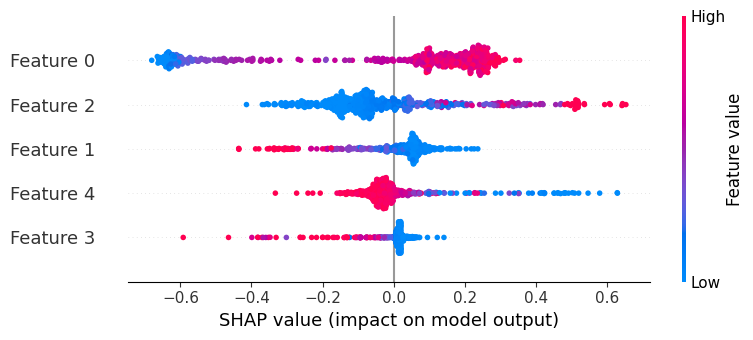

In [30]:
shap.summary_plot(shap_values, X_test)